In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,AveragePooling2D,BatchNormalization,Dropout,Input,Activation
from keras.callbacks import ModelCheckpoint, TensorBoard ,EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [2]:
datadir_train=r"D:\Emotion_dataset\train"

In [3]:
datadir_valid=r"D:\Emotion_dataset\valid"

In [4]:
datadir_test=r"D:\Emotion_dataset\test"

In [5]:
catgories=["angry","disgusted","fearful","happy","neutral","sad","surprised"]

In [6]:
training_data=[]
valid_data=[]
test_data=[]

In [7]:
for catgory in catgories:
    path1= os.path.join(datadir_train,catgory)#D:\AMIT_CONTENT\AMIT_CV\data\train/cat
    class_num=catgories.index(catgory)
    for img in os.listdir(path1): #D:\AMIT_CONTENT\AMIT_CV\data\train/cat/0img...
        #[list have all content at folder bening then malignant 0jpg,1jpg,2jpg,... loop on names of all image inside folder]
        try:
            array_of_train_img=cv2.imread(os.path.join(path1,img))#[read image in folder using open cv merge (index 0jpg with image)]
           # array_of_train_img=cv2.cvtColor(array_of_train_img, cv2.COLOR_BGR2GRAY)
            #resize image 
            array_of_train_img=cv2.resize(array_of_train_img,(224,224))
            training_data.append([array_of_train_img,class_num])
        except Exception as ex:
            pass
# try except to avoid any error   

for catgory in catgories:
    path2=os.path.join(datadir_valid,catgory)
    class_num=catgories.index(catgory)
    for img in os.listdir(path2):
        try:
            array_of_valid_img=cv2.imread(os.path.join(path2,img))
            #array_of_valid_img=cv2.cvtColor(array_of_valid_img,cv2.COLOR_BGR2GRAY)
            array_of_valid_img=cv2.resize(array_of_valid_img,(224,224))
            
            valid_data.append([array_of_valid_img,class_num])
        except Exception as ex:
            pass




for catgory in catgories:
    path3=os.path.join(datadir_test,catgory)
    class_num=catgories.index(catgory)
    for img in os.listdir(path3):
        try:
            array_of_test_img=cv2.imread(os.path.join(path3,img))
            #array_of_test_img=cv2.cvtColor(array_of_test_img,cv2.COLOR_BGR2GRAY)
            array_of_test_img=cv2.resize(array_of_test_img,(224,224))

            test_data.append([array_of_test_img,class_num])
        except Exception as ex:
            pass

In [8]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)
#Shuffling the training data is a common technique used in machine learning to prevent the model from overfitting to the training data 

In [9]:
#i=matrix_img
#j=index_labels
x_train=[]
y_train=[]
for i, j in training_data:
    x_train.append(i)
    y_train.append(j)
#i=matrix_img
#j=index_labels
x_val=[]
y_val=[]
for m, n in valid_data:
    x_val.append(m)
    y_val.append(n)
x_test=[]
y_test=[]
for a, b in test_data:
    x_test.append(a)
    y_test.append(b)

In [10]:
x_train=np.array(x_train)

x_val=np.array(x_val)

x_test=np.array(x_test)
#########################################
y_train=np.array(y_train)

y_val=np.array(y_val)

y_test=np.array(y_test)


In [11]:
x_train=np.array(x_train).reshape(-1,224,224,3)

x_val=np.array(x_val).reshape(-1,224,224,3)

x_test=np.array(x_test).reshape(-1,224,224,3)
#-1 = all image in x resize it to 224,224,3

In [12]:
x_train.shape

(28709, 224, 224, 3)

In [14]:
'''train_batch=ImageDataGenerator(horizontal_flip=True,rotation_range=2,zoom_range=0.1,preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
directory=datadir_train,target_size=(224,224),batch_size=128,shuffle=True)

valid_batch=ImageDataGenerator(horizontal_flip=True,rotation_range=2,zoom_range=0.1,preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
directory=datadir_valid,target_size=(224,224),batch_size=128,shuffle=True)

test_batch=ImageDataGenerator(horizontal_flip=True,rotation_range=2,zoom_range=0.1,preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
directory=datadir_test,target_size=(224,224),batch_size=128,shuffle=True)'''

'train_batch=ImageDataGenerator(horizontal_flip=True,rotation_range=2,zoom_range=0.1,preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(\ndirectory=datadir_train,target_size=(224,224),batch_size=128,shuffle=True)\n\nvalid_batch=ImageDataGenerator(horizontal_flip=True,rotation_range=2,zoom_range=0.1,preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(\ndirectory=datadir_valid,target_size=(224,224),batch_size=128,shuffle=True)\n\ntest_batch=ImageDataGenerator(horizontal_flip=True,rotation_range=2,zoom_range=0.1,preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(\ndirectory=datadir_test,target_size=(224,224),batch_size=128,shuffle=True)'

In [15]:
'''imgs_train,labels_train= next(train_batch)
imgs_valid,labels_valid= next(valid_batch)
imgs_test,labels_test= next(test_batch)'''

'imgs_train,labels_train= next(train_batch)\nimgs_valid,labels_valid= next(valid_batch)\nimgs_test,labels_test= next(test_batch)'

In [67]:
emotion_model1=Sequential()
#1st Convolution Layer
emotion_model1.add(Input(shape=(x_train.shape[1:])))
emotion_model1.add(Conv2D(filters=32,kernel_size=(9,9),strides=3,padding='same'))
emotion_model1.add(BatchNormalization())
#emotion_model.add(Activation('relu'))
emotion_model1.add(AveragePooling2D(pool_size=(4,4),strides=2,padding='valid'))
emotion_model1.add(Dropout(0.4))

#2st Convolution Layer
emotion_model1.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same'))
emotion_model1.add(BatchNormalization())
emotion_model1.add(Activation('relu'))
emotion_model1.add(AveragePooling2D(pool_size=(2,2),strides=1,padding='valid'))
emotion_model1.add(Dropout(0.4))

#3st Convolution Layer
emotion_model1.add(Conv2D(filters=108,kernel_size=(7,7),strides=3,padding='same'))
emotion_model1.add(BatchNormalization())
emotion_model1.add(Activation('relu'))
emotion_model1.add(AveragePooling2D(pool_size=(4,4),strides=2,padding='valid'))
emotion_model1.add(Dropout(0.4))


#flatten layer

emotion_model1.add(Flatten())

#FC layer

emotion_model1.add(Dense(192))
emotion_model1.add(BatchNormalization())
emotion_model1.add(Activation('relu'))
emotion_model1.add(Dropout(.5))

emotion_model1.add(Dense(384))
emotion_model1.add(BatchNormalization())
emotion_model1.add(Activation('relu'))
emotion_model1.add(Dropout(.5))

emotion_model1.add(Dense(768))
emotion_model1.add(BatchNormalization())
emotion_model1.add(Activation('relu'))
emotion_model1.add(Dropout(.5))

emotion_model1.add(Dense(1536))
emotion_model1.add(BatchNormalization())
emotion_model1.add(Activation('relu'))
emotion_model1.add(Dropout(.5))

#output layer
emotion_model1.add(Dense(7))
emotion_model1.add(Activation('softmax'))


In [68]:
emotion_model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 75, 75, 32)        7808      
                                                                 
 batch_normalization_54 (Ba  (None, 75, 75, 32)        128       
 tchNormalization)                                               
                                                                 
 average_pooling2d_24 (Aver  (None, 36, 36, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_54 (Dropout)        (None, 36, 36, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 batch_normalization_55 (Ba  (None, 36, 36, 64)       

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Apply one-hot encoding to y_train
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()

y_val_encoded = encoder.fit_transform(y_val.reshape(-1, 1)).toarray()

# Apply one-hot encoding to y_test
y_test_encoded = encoder.transform(y_test.reshape(-1, 1)).toarray()

In [70]:
emotion_model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#we = use sparse_categorical_crossentropy when we not apply one hot encoder

In [71]:
es= EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# patience : after 5 epochs if val_loss doesnt improve stop

In [74]:
history=emotion_model1.fit(x_train,y_train_encoded,validation_data=(x_val,y_val_encoded),batch_size=16,epochs=100
                               ,shuffle=True,verbose=1).history
#batch size number of train in each epoch
#epoch how many times the entire training dataset will be passed through the neural network during training.
#step per epoch calculated by dividing the total number of training examples by the batch size 2637/32

Epoch 1/100
1795/1795 [==============================] - 238s 130ms/step - loss: 2.1018 - accuracy: 0.2217 - val_loss: 2.0255 - val_accuracy: 0.2625
Epoch 2/100
1795/1795 [==============================] - 215s 120ms/step - loss: 1.9188 - accuracy: 0.2550 - val_loss: 1.9718 - val_accuracy: 0.2649
Epoch 3/100
1795/1795 [==============================] - 222s 124ms/step - loss: 1.8071 - accuracy: 0.3032 - val_loss: 1.8060 - val_accuracy: 0.3357
Epoch 4/100
1795/1795 [==============================] - 219s 122ms/step - loss: 1.7095 - accuracy: 0.3469 - val_loss: 1.7210 - val_accuracy: 0.3345
Epoch 5/100
1795/1795 [==============================] - 221s 123ms/step - loss: 1.6285 - accuracy: 0.3836 - val_loss: 1.4554 - val_accuracy: 0.4310
Epoch 6/100
1795/1795 [==============================] - 214s 119ms/step - loss: 1.5586 - accuracy: 0.4024 - val_loss: 1.5051 - val_accuracy: 0.4109
Epoch 7/100
1795/1795 [==============================] - 215s 120ms/step - loss: 1.5101 - accuracy: 0.4211

In [77]:
emotion_model1.evaluate(x_test,y_test_encoded)

225/225 [==============================] - 13s 57ms/step - loss: 1.0390 - accuracy: 0.6140


[1.0390100479125977, 0.6139593124389648]

In [78]:
emotion_model1.save('my_emoition_model.h5')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
emotion_model1_load=load_model('my_emoition_model.h5')

In [15]:
emotion_model1_load.evaluate(x_test,y_test_encoded)


225/225 [==============================] - 15s 66ms/step - loss: 1.0390 - accuracy: 0.6140


[1.0390100479125977, 0.6139593124389648]

In [82]:
emotion_model1_json=emotion_model1.to_json()
with open ("emotion_model1.json","w") as json_file:
    json_file.write(emotion_model1_json)

In [16]:
y_prd=emotion_model1_load.predict(x_test)

225/225 [==============================] - 32s 141ms/step


In [17]:
y_prd

array([[6.0490692e-01, 6.2795240e-03, 2.5522538e-02, ..., 2.4010780e-01,
        9.9708475e-02, 1.9328187e-03],
       [1.9142684e-02, 3.0124868e-04, 1.0952958e-01, ..., 3.5195559e-02,
        2.6256939e-02, 7.7568090e-01],
       [6.4408965e-03, 8.0693839e-04, 1.7173044e-02, ..., 1.6597101e-02,
        1.0071421e-02, 5.9572104e-03],
       ...,
       [2.1895494e-01, 4.3898425e-03, 1.6166200e-01, ..., 2.1312290e-01,
        3.9594829e-01, 5.4982901e-03],
       [3.5627603e-03, 6.8697867e-05, 4.5007495e-03, ..., 1.6575588e-02,
        3.7556019e-02, 5.0990464e-04],
       [2.9684749e-02, 1.2606563e-04, 7.8926124e-02, ..., 7.4044186e-01,
        1.3751762e-01, 1.2515754e-02]], dtype=float32)

In [18]:
y_prd = np.argmax(y_prd, axis=1)

In [19]:
y_prd

array([0, 6, 3, ..., 5, 3, 4], dtype=int64)

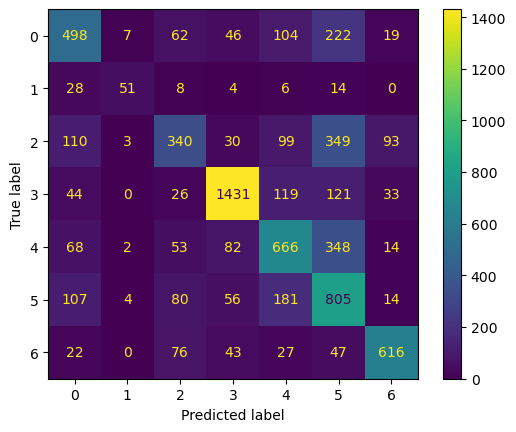

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
class_names = {0: "angry", 1: "disgusted", 2: "fearful", 3: "happy", 4: "neutral", 5: "sad", 6: "surprised"}

conf_matrix=confusion_matrix(y_test,y_prd)

cm_display= ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
cm_display.plot()
plt.show()


In [21]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       958
           1       0.76      0.46      0.57       111
           2       0.53      0.33      0.41      1024
           3       0.85      0.81      0.83      1774
           4       0.55      0.54      0.55      1233
           5       0.42      0.65      0.51      1247
           6       0.78      0.74      0.76       831

    accuracy                           0.61      7178
   macro avg       0.64      0.58      0.60      7178
weighted avg       0.63      0.61      0.61      7178



In [22]:
class_names = {0: "angry", 1: "disgusted", 2: "fearful", 3: "happy", 4: "neutral", 5: "sad", 6: "surprised"}

def transform_pred(model, x):
    pred = model.predict(x)
    transformed_pred = []
    for i in range(len(pred)):
        decoded_pred = np.argmax(pred[i])
        transformed_pred.append(class_names[decoded_pred])
    return transformed_pred

# Assuming you have one-hot encoded y_test
y_test_decoded = np.argmax(y_test_encoded, axis=1)
y_pred_transformed = transform_pred(emotion_model1_load, x_test)

# Compare y_test_decoded and y_pred_transformed

225/225 [==============================] - 18s 81ms/step


In [36]:
img=cv2.imread('angr3.jpeg')
img=cv2.resize(img,(224,224))
img=np.array(img).reshape(-1,224,224,3)

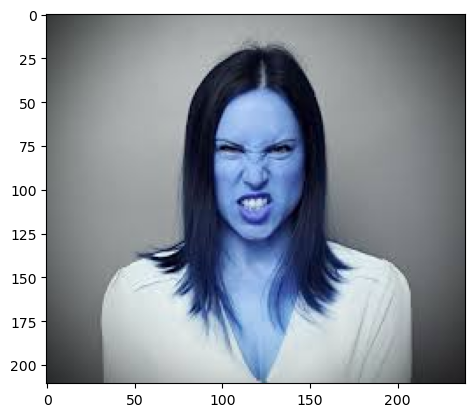

1/1 [==============================] - 0s 29ms/step
['sad']


In [38]:
import matplotlib.pyplot as plt
img1=cv2.imread('angr3.jpeg')#[read image in folder using open cv merge (index 0jpg with image)]
plt.imshow(img1)
plt.show()
print(transform_pred(emotion_model1_load,img))

In [41]:
path_to_haar = "haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN


rectangle_bar=(255,255,255)

img=np.zeros((500,500))

text="emoiton detection"

(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]

text_offset_x=10
text_offset_y=img.shape[0]-255

box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bar,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened:
    raise IOError("caanot open webcam")
while True:
    ret, frame = cap.read()

    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Iterate over detected faces
    for x, y, w, h in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color=frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        facess=faceCascade.detectMultiScale(roi_gray)

        if len(facess)==0:
            print("face not detect")
        else:
            for (ex,ey,ew,eh)in facess:
                face_roi=roi_color[ey:ey+eh,ex:ex+ew]
           
    final_imge=cv2.resize(face_roi,(224,224))
    final_imge=np.expand_dims(final_imge,axis=0)
    final_imge=final_imge/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    predictions=emotion_model1_load.predict(final_imge)
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN

    if(np.argmax(predictions)==0):
        status="angry"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(predictions)==1):
        status="disgusted"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(predictions)==2):
        status="fearful"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    elif(np.argmax(predictions)==3):
        status="happy"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif(np.argmax(predictions)==4):
        status="neutral"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    elif(np.argmax(predictions)==5):
        status="sad"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    else:
        status="surprised"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))



    cv2.imshow("face emoition",frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


NameError: name 'face_roi' is not defined